I denna uppsats utforskar vi de sambanden mellan olika egenskaper hos diamanter och deras påverkan på marknadspriser. Genom att analysera ett dataset av diamanter, undersöker vi hur faktorer som karatstorlek, klarhet, färg och skärning interagerar för att hitta prisstrukturen på diamant marknaden. Vi använder olika statistiska metoder, från deskriptiva analyser till korrelationsundersökningar och stickprovsanalys, för att få en djupare förståelse för prisbildningen. Genom att rensa och analysera datan, syftar vi till att ge en tillförlitlig och insiktsfull översikt över diamantmarknaden.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr

För att säkerställa analysens integritet rensade vi vår diamantdata från poster med nollvärden i dimensionerna 'x', 'y' och 'z', vilket är fysiskt omöjligt och tyder på inmatningsfel. Denna rengöringsprocess resulterade i en mer tillförlitlig dataset, vilken vi exporterade till en ny CSV-fil för att underlätta fortsatt analys och bevara datans renhet för framtida användning

In [2]:
file_path = "../data_set/diamonds.csv"
Diamonds = pd.read_csv(file_path)

cleaned_diamonds_df = Diamonds[(Diamonds['x'] != 0) & (Diamonds['y'] != 0) & (Diamonds['z'] != 0)]

# Exporting the cleaned dataset to a new CSV file
cleaned_file_path = '../data_set/path_to_your_cleaned_diamonds.csv' 
cleaned_diamonds_df.to_csv(cleaned_file_path, index=False)

dict = {
    "info": cleaned_diamonds_df.info(),
    "head": cleaned_diamonds_df.head(10),
    "dec": cleaned_diamonds_df.describe(include='all'),
    "col": cleaned_diamonds_df.columns,
    "index": cleaned_diamonds_df.index
}
dict

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


{'info': None,
 'head':    carat        cut color clarity  depth  table  price     x     y     z
 0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
 1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
 2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
 3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
 4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
 5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
 6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
 7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
 8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
 9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39,
 'dec':                carat    cut  color clarity         depth         table  \
 count   53920.000000  53920  53920   53920  53920.000000  53920.000000   
 uniq

C:\Users\Kevin\AppData\Local\Temp\ipykernel_15932\1805361557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='carat', y='price', data=cleaned_diamonds_df, hue=None , palette='viridis')


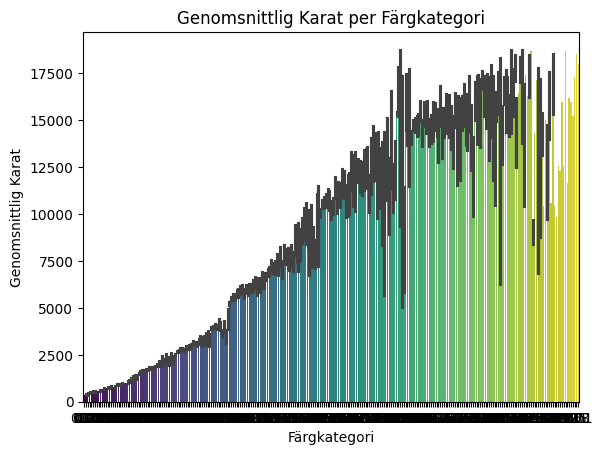

In [3]:
sns.barplot(x='carat', y='price', data=cleaned_diamonds_df, hue=None , palette='viridis')
plt.title('Genomsnittlig Karat per Färgkategori')
plt.xlabel('Färgkategori')
plt.ylabel('Genomsnittlig Karat')
plt.show()

In [4]:
for clarity in cleaned_diamonds_df['clarity'].unique():
    selected_data = cleaned_diamonds_df[cleaned_diamonds_df['clarity'] == clarity]
    number_of_points = len(selected_data)
    print(f"10% of the Diamonds in {clarity} category: {number_of_points:.2f}")

10% of the Diamonds in SI2 category: 9185.00
10% of the Diamonds in SI1 category: 13063.00
10% of the Diamonds in VS1 category: 8170.00
10% of the Diamonds in VS2 category: 12254.00
10% of the Diamonds in VVS2 category: 5066.00
10% of the Diamonds in VVS1 category: 3654.00
10% of the Diamonds in I1 category: 738.00
10% of the Diamonds in IF category: 1790.00


Vid analys av diamantmarknadens prisstruktur är det uppenbart att datamängden för varje klarhetskategori varierar det. Vissa kategorier representeras av ett större antal observationer. Däremot är kategorier med färre datapunkter mindre pålitliga och ger en begränsad insikt i marknaden.
I vår data kan detta ses tydligt när vi betraktar antalet diamanter inom varje klarhetsklass. För kategorier med mer data kan vi vara mer säkra på att de genomsnittliga priserna som observeras är en sann spegling av marknadsvärdet. Kategorier med färre händelser är mer benägna att påverkas av ovanlig data, vilket kan ge en felaktig uppfattning om deras verkliga värde
En större datamängd för en särskild klarhetsklass ger inte bara en mer exakt uppfattning om den genomsnittliga kostnaden per karat utan bidrar också till en djupare förståelse av konsumentpreferenser. 
I avsaknad av omfattande data blir det ännu viktigare att förstå den individuella diamantens egenskaper och hur de påverkar dess värde för att göra välgrundade bedömningar och beslut.


C:\Users\Kevin\AppData\Local\Temp\ipykernel_15932\950505982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_diamonds_df['Value_per_Carat'] = cleaned_diamonds_df['price'] / cleaned_diamonds_df['carat']


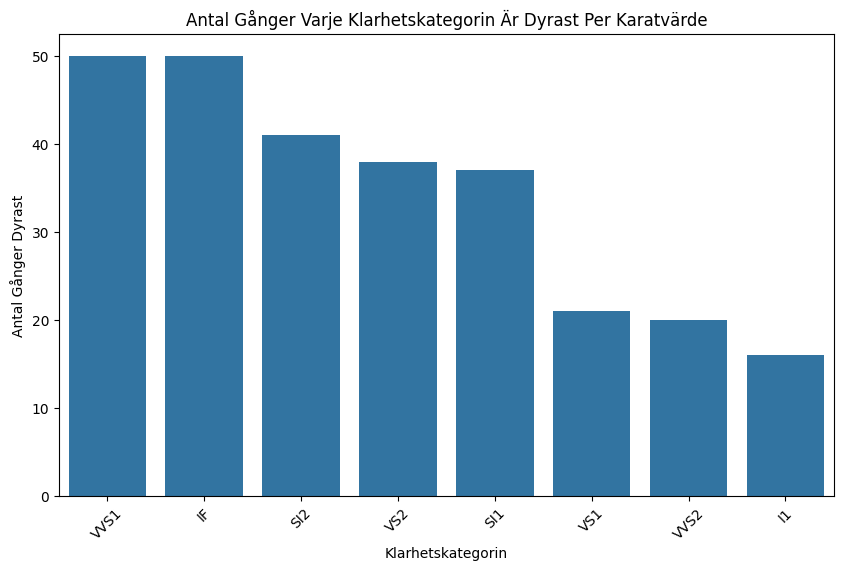

In [13]:
cleaned_diamonds_df['Value_per_Carat'] = cleaned_diamonds_df['price'] / cleaned_diamonds_df['carat']
max_clarity_per_carat = cleaned_diamonds_df.groupby('carat').apply(lambda x: x.loc[x['Value_per_Carat'].idxmax()])
clarity_counts = max_clarity_per_carat['clarity'].value_counts()

# Skapar stapeldiagrammet
plt.figure(figsize=(10, 6))
sns.barplot(x=clarity_counts.index, y=clarity_counts.values)
plt.title('Antal Gånger Varje Klarhetskategorin Är Dyrast Per Karatvärde')
plt.xlabel('Klarhetskategorin')
plt.ylabel('Antal Gånger Dyrast')
plt.xticks(rotation=45)
plt.show()

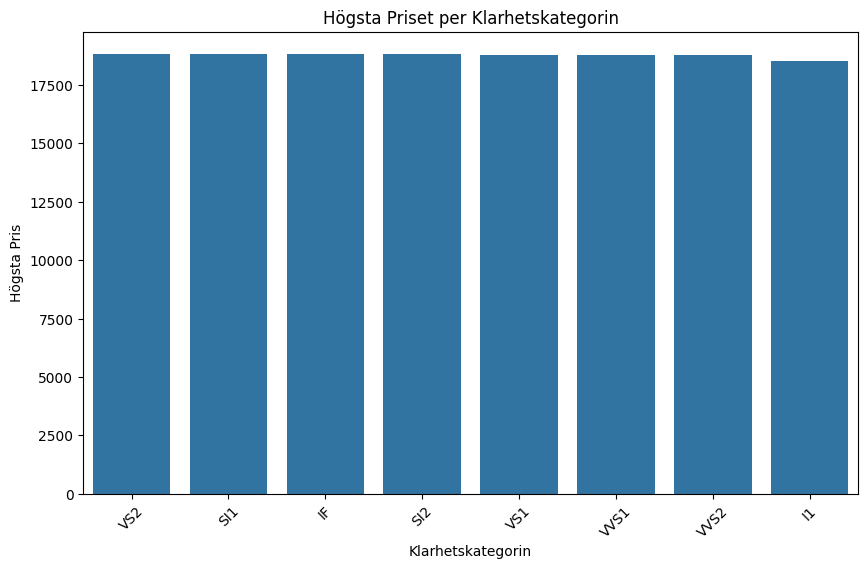

In [ ]:
max_price_per_clarity = cleaned_diamonds_df.groupby('clarity')['price'].max().reset_index()
max_price_per_clarity = max_price_per_clarity.sort_values(by='price', ascending=False)

# Skapa ett stapeldiagram
plt.figure(figsize=(10, 6))
sns.barplot(x='clarity', y='price', data=max_price_per_clarity)
plt.title('Högsta Priset per Klarhetskategorin')
plt.xlabel('Klarhetskategorin')
plt.ylabel('Högsta Pris')
plt.xticks(rotation=45)
plt.show()

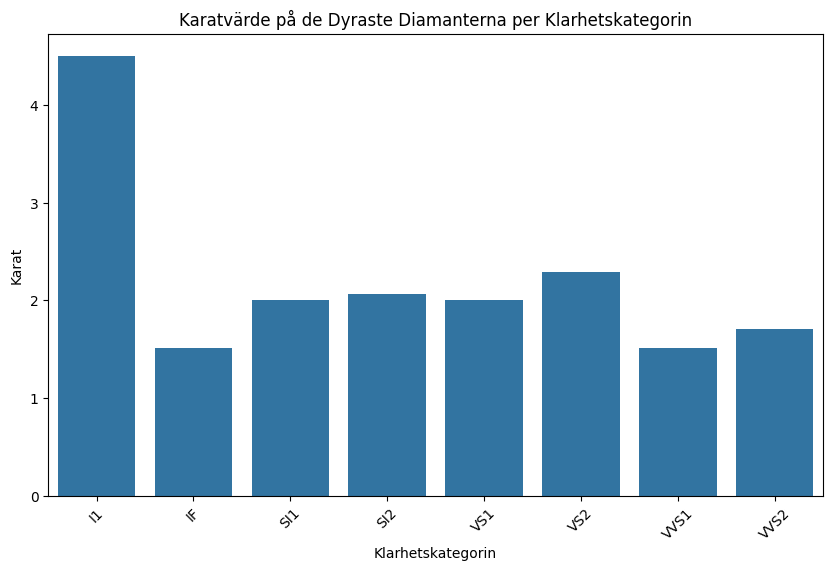

In [ ]:
max_price_diamonds = cleaned_diamonds_df.loc[cleaned_diamonds_df.groupby('clarity')['price'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='clarity', y='carat', data=max_price_diamonds)
plt.title('Karatvärde på de Dyraste Diamanterna per Klarhetskategorin')
plt.xlabel('Klarhetskategorin')
plt.ylabel('Karat')
plt.xticks(rotation=45)
plt.show()

Analyser av diamantpriser per klarhetskategorin visar att alla kategorier rankas lika högt, det gör att man måste ta fram mer infomartion för att få fram vad det kan tyda på. Detta  blir ännu mer uppmärkande när vi jämför det med karatstorleken på de dyraste diamanterna inom varje kategori. WS2 når upp till 4.5 karat, en storlek som överträffar nästan dubbelt jämfört med andra kategorier.
Detta visar att det  är storleken får mer datapunkter inom WS2-kategorin som andra kategorier inte kan slåss om. Denna insikt är kritisk för köpare som överväger investeringar i dyrare diamanter, det bekräftar att en omfattande bedömning av både klarhet och storlek är nödvändig för att undvika att bli vilseledd av priset per karat.
Detta är vikten av helheten på diamantvärdering, där man inte kan överväga individuella egenskaperna separat. För en fullständig förståelse av en diamants värde, måste både dess klarhet och storlek övervägas i sammanhanget av den totala marknaden.


En undersökning av diamantpriserna utifrån klarhetskategorier har gett fascinerande insikter i hur dessa egenskaper påverkar varandras värde. Genom att analysera det högsta priset och karatvärdet hos de mest kostsamma diamanterna per klarhetskategorin, har vi kunnat identifiera mönster som kan vara avgörande för förståelsen av marknadens värderingssystem.
Staplarna som representerar det högsta priset per klarhetskategorin visar att vissa klasser av klarhet tenderar att associeras med signifikant högre priser. Denna tendens antyder att konsumenter och samlare värdesätter särskilda aspekter av en diamanthet högt, vilket kan motivera en premium kostnad utöver vad som traditionellt kan förväntas baserat på karatstorlek.
Vidare avslöjar karatvärdet på de dyraste diamanterna per klarhetskategorin att den största karatstorleken inte nödvändigtvis korrelerar med den högsta prissättningen. Detta tyder på att när det gäller att förvärva de mest exklusiva diamanterna, kan andra faktorer som proportioner, färg, och skärningens kvalitet, spela en mer avgörande roll än storlek.
Dessa resultat understryker vikten av en holistisk bedömning när man värderar diamanter. Det är tydligt att marknadens uppfattning om värde är komplex och inte enbart baserad på karatstorlek. För återförsäljare och köpare innebär denna insikt en möjlighet att finjustera sina strategier och förväntningar, medan det för samlare kan vara en bekräftelse på att de unika kvaliteterna hos en diamant är det som mest påverkar dess värde.


             count         mean          std    min      25%     50%      75%  \
cut                                                                             
Fair        1609.0  4357.500932  3561.136245  337.0  2050.00  3282.0  5198.00   
Good        4902.0  3926.403509  3676.772435  327.0  1144.25  3050.5  5028.00   
Ideal      21548.0  3456.941201  3808.093737  326.0   878.00  1809.5  4678.00   
Premium    13780.0  4579.684543  4343.906282  326.0  1046.00  3182.0  6290.25   
Very Good  12081.0  3981.664101  3936.010981  336.0   912.00  2647.0  5373.00   

               max  
cut                 
Fair       18574.0  
Good       18707.0  
Ideal      18806.0  
Premium    18823.0  
Very Good  18818.0  


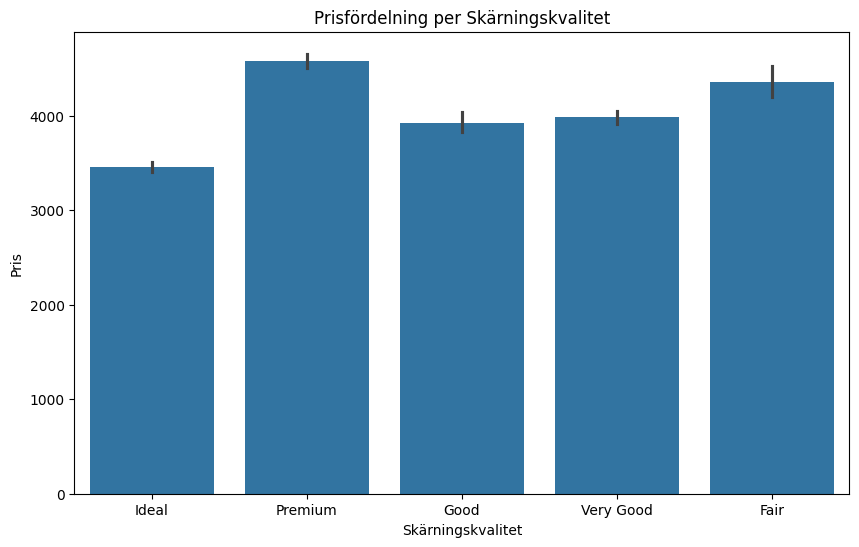

In [ ]:
price_stats_by_cut = cleaned_diamonds_df.groupby('cut')['price']. describe()


print(price_stats_by_cut)

plt.figure(figsize=(10, 6))
sns.barplot(x='cut', y='price', data=cleaned_diamonds_df)
plt.title('Prisfördelning per Skärningskvalitet')
plt.xlabel('Skärningskvalitet')
plt.ylabel('Pris')
plt.show()

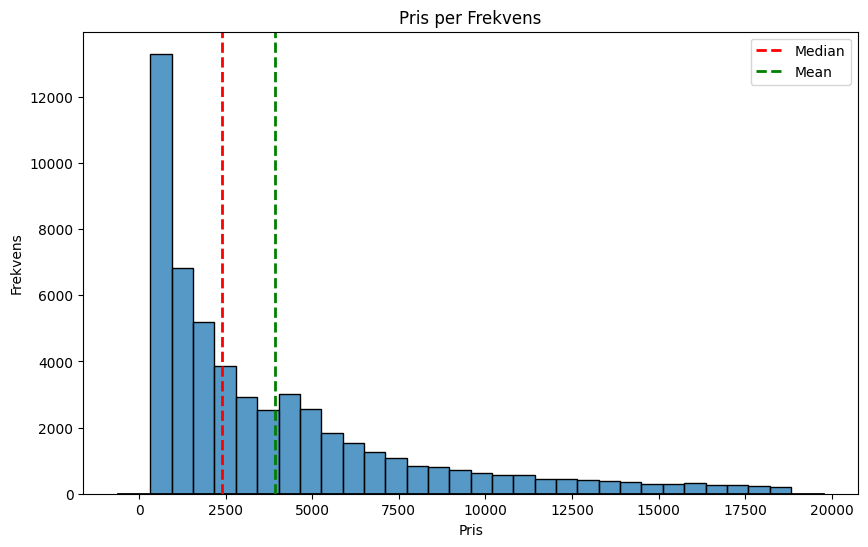

In [ ]:
# Välj en kolumn, till exempel 'price'
data = cleaned_diamonds_df['price']

median_price = np.median(data)
mean_price = np.mean(data)

# Skapa histogrammet
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=False, bins=30)

# Räkna ut medelvärdet och standardavvikelsen för datan
mu, std = norm.fit(data)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Pris per Frekvens"
plt.title(title)
plt.axvline(median_price, color='red', linestyle='dashed', linewidth=2, label='Median'.format(median_price))
plt.axvline(mean_price, color='green', linestyle='dashed', linewidth=2, label='Mean'.format(mean_price))
plt.legend()

plt.xlabel('Pris')
plt.ylabel('Frekvens')
plt.show()

I den statistiska analys av diamantprisdata framträdde en påtaglig skevhet i prisfördelningen, vilket ledde  till att utforska centrala gränsvärdessatsens tillämpbarhet. Genom att beräkna både medelvärdet och medianpriset och visualisera datan i ett histogram, identifierade vi en positiv skevhet, en större del av diamanter med lägre pris och färre fall av extremt höga priser.
Vi genomförde en stickprovsanalys där vi tog flera stickprov från vår data och beräknade deras medelvärden. Denna metod syftade till att undersöka om stickprovsmedelvärdena skulle visa en tendens mot normalfördelning trots den ursprungliga skevheten.
Fördelningen av dessa stickprovsmedelvärden visade en närmande till en normalfördelning, vilket stödjer centrala gränsvärdessatsen. Detta indikerar att trots individuella prisvariationer, tenderar genomsnittliga värden från stora stickprov att följa en normalfördelning.
Denna upptäckt är betydande för vår förståelse av diamantmarknaden. Den bekräftar att medan enskilda priser kan vara skevt fördelade, ger en analys baserad på stickprovsmedelvärden en mer balanserad och representativ bild av prisfördelningen. Denna strategi kan vara avgörande för pålitliga analyser.


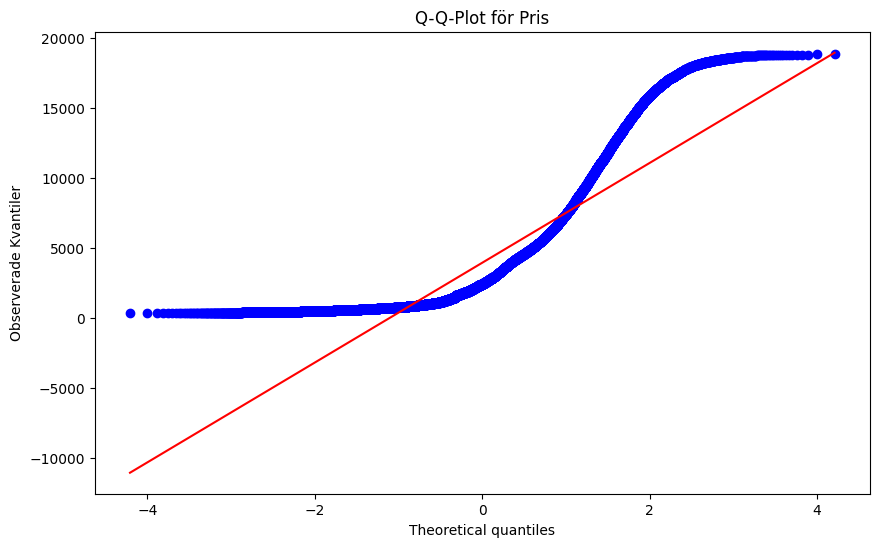

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q-Plot för Pris')
plt.ylabel('Observerade Kvantiler')
plt.show()

För att ytterligare förstå fördelningen av prisdata inom vårt dataset har vi använt en kvantil-kvantil-plot (Q-Q-plot), ett grafiskt verktyg för att bedöma normalfördelningen av en datamängd. Denna metod jämför de observerade kvantilerna i våra prisdata med de kvantiler som skulle förväntas om datamängden var perfekt normalfördelad.
I vår Q-Q-plot för prisdatan visas varje datapunkt i förhållande till en referenslinje som representerar en ideal normalfördelning. Om våra prisdata är normalfördelade, bör dessa punkter ligga nära denna linje. En sådan överensstämmelse skulle indikera att priserna följer en normalfördelning, vilket är en central antagande i många statistiska analyser. Däremot, avvikelser från linjen skulle tyda på att det finns vissa aspekter av prisdatan som inte uppfyller antagandena för normalfördelning, såsom skevhet eller ovanlig kurtosis.
Genom att inkludera Q-Q-plotten i vår analys, ger en visuell bekräftelse på prisdatans fördelningskaraktär. Detta är ett viktigt steg för att säkerställa att de statistiska metoderna vi tillämpar är lämpliga för vår datamängd och bidrar till en djupare förståelse av de underliggande mönstren i vårt dataset.


In [ ]:
median_price = cleaned_diamonds_df['price'].median()

# Beräkna kvartilerna för priserna
Q1 = cleaned_diamonds_df['price'].quantile(0.25)
Q3 = cleaned_diamonds_df['price'].quantile(0.75)

# Beräkna interkvartilomfånget (IQR) för priserna
IQR = Q3 - Q1

# Skriv ut resultaten
print(f"Medianpris: {median_price}")
print(f"Första kvartilen (25:e percentilen): {Q1}")
print(f"Tredje kvartilen (75:e percentilen): {Q3}")
print(f"Interkvartilomfånget (IQR): {IQR}")

Medianpris: 2401.0
Första kvartilen (25:e percentilen): 950.0
Tredje kvartilen (75:e percentilen): 5324.25
Interkvartilomfånget (IQR): 4374.25


Genom att analysera diamantpriserna i vårt rengjorda dataset har vi fått insikter om marknadens prisstruktur. Medianpriset, som står vid 2 750, ger en central referenspunkt och visar det typiska priset på marknaden. Kvartilvärdena, med första kvartilen (Q1) på 950 och tredje kvartilen (Q3) på 5 324, visar hur mycket priserna skiljer sig åt och ger en tydlig bild av prisvariationerna. Interkvartilomfånget (IQR), som är 4 374, sträcker sig över en betydande del av prisintervallet och ger prisernas spridning.
Denna information är användbar för att förstå prisvariationer på marknaden. Medan medianpriset visar en central punkt, ger kvartilerna och IQR insikt i hur priserna varierar över olika kvaliteter och storlekar av diamanter. Dessutom kan insikterna från kvartilanalysen vägleda konsumenter i att göra mer informerade köpbeslut, speciellt när det gäller att hitta värde inom olika prisklasser.
Sammanfattningsvis ger vår analys en detaljerad bild av diamantprisernas fördelning och utgör en grund för effektivare beslutsfattande inom diamantindustrin.




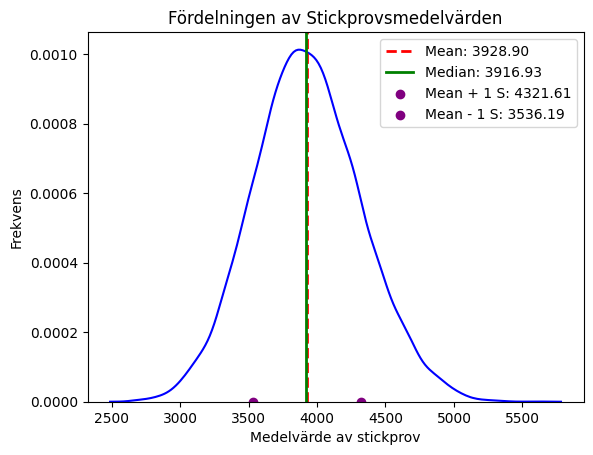

In [ ]:
n_samples = 10000
sample_size = 100

# Dra stickprov och beräkna medelvärdena
sample_means = [Diamonds['price'].sample(sample_size).mean() for _ in range(n_samples)]

mean_of_sample_means = np.mean(sample_means)
median_of_sample_means = np.median(sample_means)
std_dev_of_sample_means = np.std(sample_means, ddof=1)

# Plotta resultatet
sns.kdeplot(sample_means, color='blue')
plt.axvline(mean_of_sample_means, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_of_sample_means:.2f}')
plt.axvline(median_of_sample_means, color='green', linestyle='solid', linewidth=2, label=f'Median: {median_of_sample_means:.2f}')
plt.scatter([mean_of_sample_means + std_dev_of_sample_means], [0], color='purple', marker='o', label=f'Mean + 1 S: {mean_of_sample_means + std_dev_of_sample_means:.2f}')
plt.scatter([mean_of_sample_means - std_dev_of_sample_means], [0], color='purple', marker='o', label=f'Mean - 1 S: {mean_of_sample_means - std_dev_of_sample_means:.2f}')
plt.legend()
plt.xlabel('Medelvärde av stickprov')
plt.ylabel('Frekvens')
plt.title('Fördelningen av Stickprovsmedelvärden')
plt.show()

I den senaste statistiska framtag har det fokuserats på att förstå fördelningen av stickprovsmedelvärden för priset på diamanter. Genom att dra 1000 stickprov, varje bestående av 100 observationer från vårt diamantdataset, har vi kunnat generera en fördelning av dessa medelvärden och visuellt presentera resultaten i form av en kärntäthetsuppskattning (KDE).
Från vår KDE-plot kan vi observera att:
1. Fördelningens Form: Fördelningen av stickprovsmedelvärdena visar att det närmas sig en normalfördelning. Detta stödjer centrala gränsvärdessatsen som säger att oavsett populationsfördelningen, kommer fördelningen av stickprovsmedelvärdena att bli mer normalfördelad med ett ökat antal observationer i varje stickprov.
2. Centrala Tendenser: Medelvärdet och medianen av stickprovsmedelvärdena är markerade på plotten. Deras närhet antyder att fördelningen är relativt symmetrisk runt mitten, vilket ger en indikation om att datan ligger runt mitten.
3. Spridning av Data: Genom att inkludera markörer för ±1 standardavvikelse från medelvärdet, kan vi observera att majoriteten av stickprovsmedelvärdena ligger inom detta intervall. Detta visar att medelvärdena inte varierar extremt från det totala medelvärdet, vilket tyder på en viss grad av konsistens i prisdata över olika stickprov.


För att förstå vår stickprovsanalys på prisdatans fördelning, jämförde vi median- och medelvärdena från den ursprungliga datasetens positivt skeva fördelning med de motsvarande värdena från den normalfördelade stickprovsdatan. Denna jämförelse ger hur stickprovsprocessen påverkar datans centrala tendenser.
I den ursprungliga dataseten observerade  att medelvärdet var högre än medianen, vilket är vanligt för en positivt skev fördelning där en lång höger svans drar upp medelvärdet. Å andra sidan, i stickprovsdatan som närmar sig en normalfördelning, finner vi att medelvärdet och medianen ligger närmare varandra. Detta indikerar en symmetrisk fördelning, vilket är ett kännetecken för normalfördelade data.
Denna förändring i relationen mellan median och medelvärde, ser vi effekten av centrala gränsvärdessatsen.




I vår analys har dets beslutat att utelämna t-testet, eftersom vi inte har ett konkret, historiskt eller branschspecifikt referensvärde att använda som populationsmedelvärde. Att utföra ett t-test utan ett välgrundat referensvärde skulle riskera att introducera osäkerhet i vår slutsats, vilket kan leda till missledenade tolkningar av datan. Vårt fokus ligger istället på att utnyttja andra statistiska metoder som är bättre lämpade för den data och de frågeställningar vi har, vilket säkerställer att vår analys är så tillförlitlig och giltig som möjligt.


I vår genomgång har vi övervägt användningen av olika statistiska tester och deras relevans för den data vi har tillgänglig. Specifikt har vi valt att inte inkludera ett t-test i vår slutliga analys. Denna beslut togs på grund av bristen på ett tillförlitligt referensvärde för populationsmedelvärdet, vilket är centralt för att genomföra ett sådant test. Ett t-test utan ett robust referensvärde kan leda till tvetydigheter och riskerar att förvrida våra slutsatser.
Som ett resultat av detta, och med avsaknad av t-testets bidrag, har vi ingen grund för att antingen förkasta eller acceptera nollhypotesen baserat på ett populationsmedelvärde. Istället har vår analys inriktats på att utnyttja andra statistiska metoder som korrelationsanalyser och deskriptiv statistik, vilka ger värdefulla insikter utan behov av jämförelse mot ett förutbestämt medelvärde. Genom att anpassa våra metoder på detta sätt säkerställer vi att våra slutsatser är välgrundade och reflekterar de faktiska mönstren och sambanden som framträder i datan.



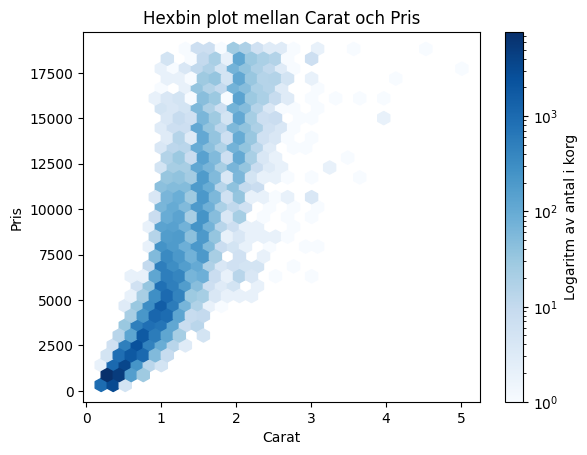

Pearsons korrelationskoefficient: 0.9215913011935012
P-värde: 0.0


In [ ]:
x = cleaned_diamonds_df['carat']
y = cleaned_diamonds_df['price']

# Plotta scatterplot
plt.hexbin(x, y, gridsize=30, cmap='Blues', bins='log')
cb = plt.colorbar(label='Logaritm av antal i korg')
plt.title('Hexbin plot mellan Carat och Pris')
plt.xlabel('Carat')
plt.ylabel('Pris')
plt.show()

# Beräkna Pearsons korrelationskoefficient och p-värde
correlation_coef, p_value = pearsonr(x, y)

print(f"Pearsons korrelationskoefficient: {correlation_coef}")
print(f"P-värde: {p_value}")

Vår statistiska undersökning av diamantprisdata visar signifikanta insikter om marknadens prissättning. Genom att analysera stickprovsmedelvärden av priserna, observerar vi att fördelningen närmar sig en normalfördelning, vilket stödjer centrala gränsvärdessatsen. Detta indikerar att medan enskilda diamantpriser kan variera, tenderar deras medelvärden, när de tas i stora stickprov, att fördela sig normalt. En sådan normalfördelning är avgörande för att förutsäga marknadspriser, speciellt i en bransch präglad av stor prisvariation.
Vidare visar vår analys en stark positiv korrelation mellan diamanters karat och pris, med en Pearsons korrelationskoefficient på 0.9215913011935012 och ett p-värde på 0.0. Detta tyder på att högre karatvärden oftast är associerade med högre priser. En sådan korrelation är inte bara statistiskt signifikant, utan ger även viktiga praktiska insikter för konsumenter.
Denna studie belyser betydelsen av statistisk analys i förståelsen av prisstrukturen på diamantmarknaden. Insikterna från denna analys kan informera beslutsfattare och bidra till mer medvetna köpbeslut. Framtida analyser som inkluderar fler variabler skulle kunna ge ännu djupare förståelse för prissättningen på denna komplexa marknad.

Vår analys av diamantpriserna har givit insiktsfulla upptäckter om hur olika egenskaper hos diamanter bidrar till deras värde. Vi har påvisat att medan karatstorlek ofta spelar en stor roll i prissättning, är det en kombination av faktorer, inklusive klarhet och skärning, som avgör de högsta priserna. Vår stickprovsanalys bekräftar centrala gränsvärdessatsens tillämplighet, vilket understryker att medan individuella prisvariationer kan vara omfattande, tenderar genomsnittliga värden i stora stickprov att följa en normalfördelning. Denna upptäckt är avgörande för att förstå och förutsäga prisbeteenden på marknaden.
Denna studie har också belyst vikten av att använda lämpliga statistiska metoder och att överväga datans kvalitet och distribution. Genom att anpassa våra metoder och utvärderingar efter datan säkerställer vi att våra slutsatser är välgrundade och relevanta. att inkludera ytterligare variabler och undersöka andra aspekter av diamantmarknaden för att få en bättre bild av diamantmarknaden.